#### Autism spectrum disorder (ASD) is a developmental disorder that affects communication and behavior. Although autism can be diagnosed at any age, it is said to be a “developmental disorder” because symptoms generally appear in the first two years of life.

#### According to the Diagnostic and Statistical Manual of Mental Disorders (DSM-5), a guide created by the American Psychiatric Association used to diagnose mental disorders, people with ASD have:Difficulty with communication and interaction with other people. Restricted interests and repetitive behaviors Symptoms that hurt the person’s ability to function properly in school, work, and other areas of life.

#### Autism is known as a “spectrum” disorder because there is wide variation in the type and severity of symptoms people experience. ASD occurs in all ethnic, racial, and economic groups. Although ASD can be a lifelong disorder, treatments and services can improve a person’s symptoms and ability to function. The American Academy of Pediatrics recommends that all children be screened for autism. 

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
sns.set(rc = {"figure.figsize":(15, 15)})

In [140]:
# zipobject = zipfile.ZipFile("autism-screening.zip")

In [141]:
# zipobject.extractall()

In [142]:
# zipobject.close()

In [143]:
data = pd.read_csv("Autism_Data.arff")

In [144]:
data.head(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                704 non-null object
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null int64
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: int64(11), object(10)
memory usage: 115.6+ KB


#### Lets rename some of our column names.

In [146]:
data.rename(columns={"austim":"autism", "jundice":"jaundice", "contry_of_res":"country"}, inplace=True)

In [147]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


#### By running head method on our data we see that in ethnicity, relations columns,  Null value is replaced by "?". Lets replace that.

In [148]:
data.replace("?", np.nan, inplace=True)

In [149]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [150]:
data.isna().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jaundice            0
autism              0
country             0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

#### Lets remove the missing data, although we wouldnt have dropped the missing rows, but since we are considering ethnicity as a feature for our model, its better to drop it.

In [151]:
data.dropna(inplace=True)  #0.13 dropped

#### Some columns in our data has quotes and uppercase lets remove the quotes and make the string values in lowercase.

In [152]:
data[["country", "age_desc", "ethnicity", "relation", "Class/ASD"]] = data[["country", "age_desc", "ethnicity", "relation", "Class/ASD"]].apply(lambda x: x.str.strip("''").str.lower())

In [153]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,white-european,no,no,united states,no,6,18 and more,self,no
1,1,1,0,1,0,0,0,1,0,1,...,m,latino,no,yes,brazil,no,5,18 and more,self,no
2,1,1,0,1,1,0,1,1,1,1,...,m,latino,yes,yes,spain,no,8,18 and more,parent,yes
3,1,1,0,1,0,0,1,1,0,1,...,f,white-european,no,yes,united states,no,6,18 and more,self,no
5,1,1,1,1,1,0,1,1,1,1,...,m,others,yes,no,united states,no,9,18 and more,self,yes


#### Lets see the relationship with cases having ASD (target variable) vs.  other features.

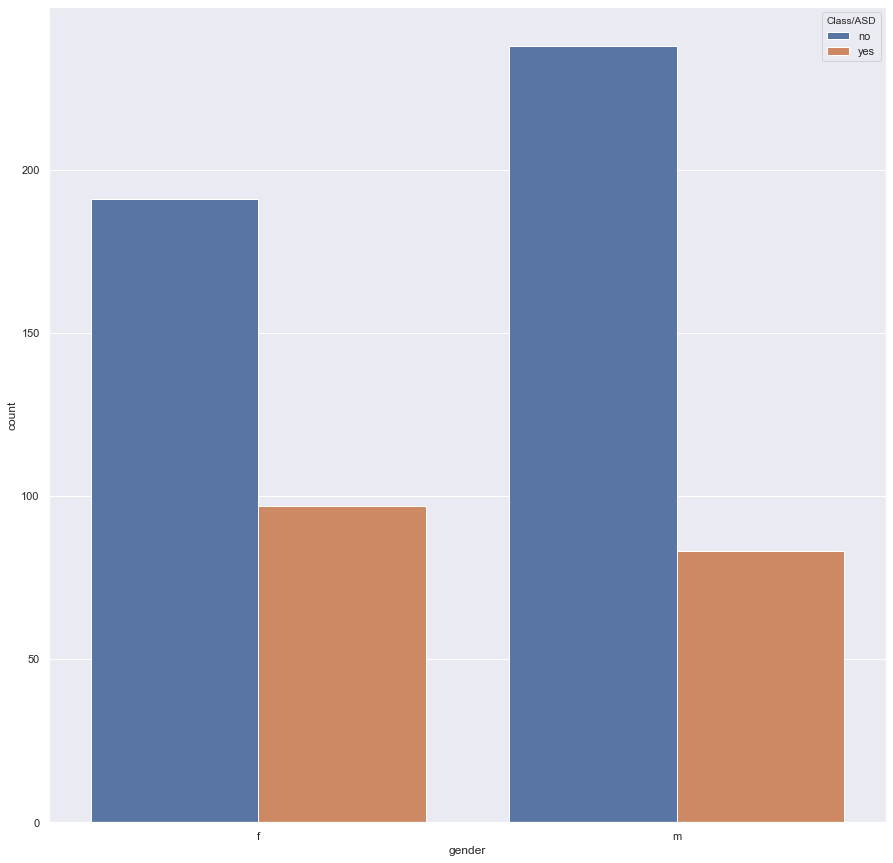

In [154]:
sns.countplot("gender", data=data, hue = "Class/ASD")

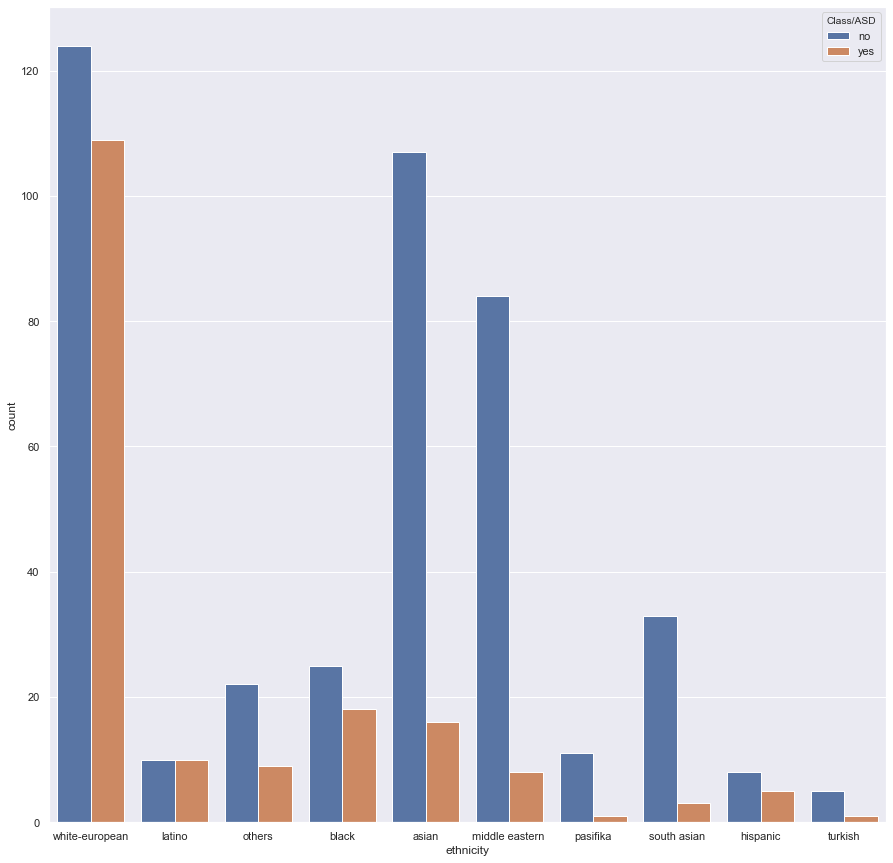

In [155]:
sns.countplot("ethnicity", data=data, hue = "Class/ASD")

#### White-Europeans have the most cases with ASD.

In [156]:
data["autism"].value_counts() 

no     524
yes     85
Name: autism, dtype: int64

#### Our target variable has unbalanced classes. 

In [157]:
data["used_app_before"].value_counts()

no     599
yes     10
Name: used_app_before, dtype: int64

#### Most of the cases were using the ASD screening app for the first time.

In [158]:
data["relation"].value_counts()

self                        522
parent                       50
relative                     28
others                        5
health care professional      4
Name: relation, dtype: int64

#### Most of our cases filled out the test by themselves. 

#### Lets drop the variables which we arent going to use in our model.

In [159]:
data.drop(columns=["age_desc", "used_app_before", "relation"], inplace=True)

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 703
Data columns (total 18 columns):
A1_Score     609 non-null int64
A2_Score     609 non-null int64
A3_Score     609 non-null int64
A4_Score     609 non-null int64
A5_Score     609 non-null int64
A6_Score     609 non-null int64
A7_Score     609 non-null int64
A8_Score     609 non-null int64
A9_Score     609 non-null int64
A10_Score    609 non-null int64
age          609 non-null object
gender       609 non-null object
ethnicity    609 non-null object
jaundice     609 non-null object
autism       609 non-null object
country      609 non-null object
result       609 non-null int64
Class/ASD    609 non-null object
dtypes: int64(11), object(7)
memory usage: 110.4+ KB


#### The age feature is coded as string, lets change it to integer.

In [161]:
data["age"] = data["age"].astype("int")

In [162]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,30.215107,5.077176
std,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,17.287470,2.522717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


#### Well the maximum age is 383, which cant be possible, lets encode it to 38, since our data ranges from 17 - 60 years. 

In [163]:
data[data["age"] == 383]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country,result,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,383,f,pasifika,no,no,new zealand,1,no


In [164]:
data.at[52, "age"] = 38

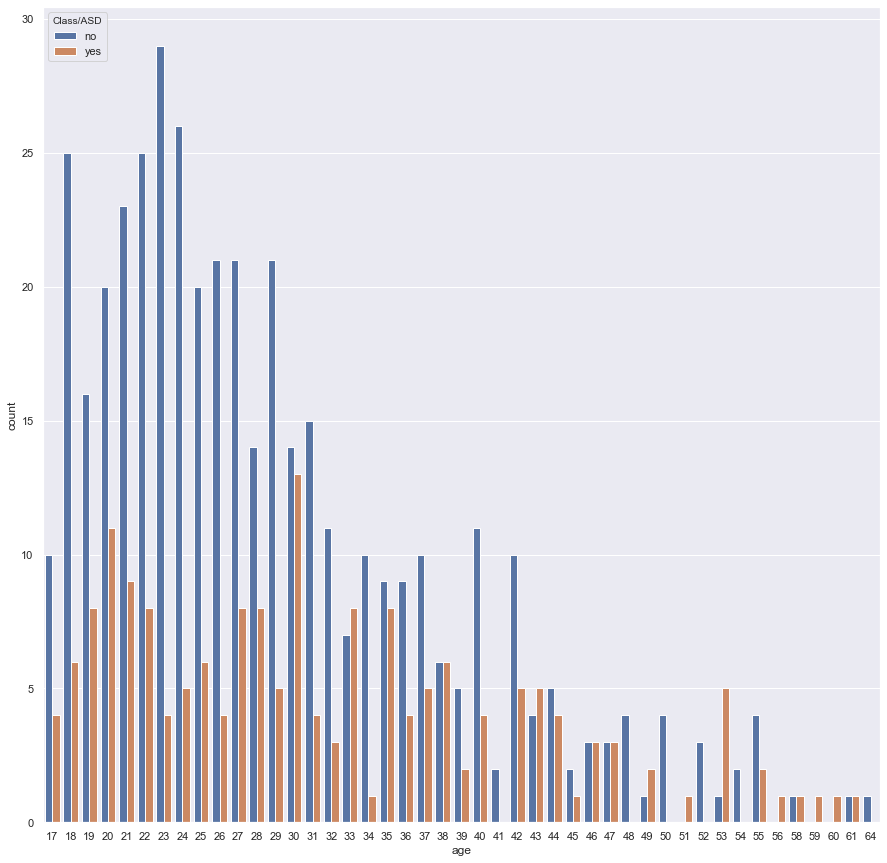

In [165]:
sns.countplot("age", data = data, hue = "Class/ASD")

#### Maximum number of our cases were of age 23 years old.  Users with the age of 53 had the positive cases of having ASD more than not having it. 

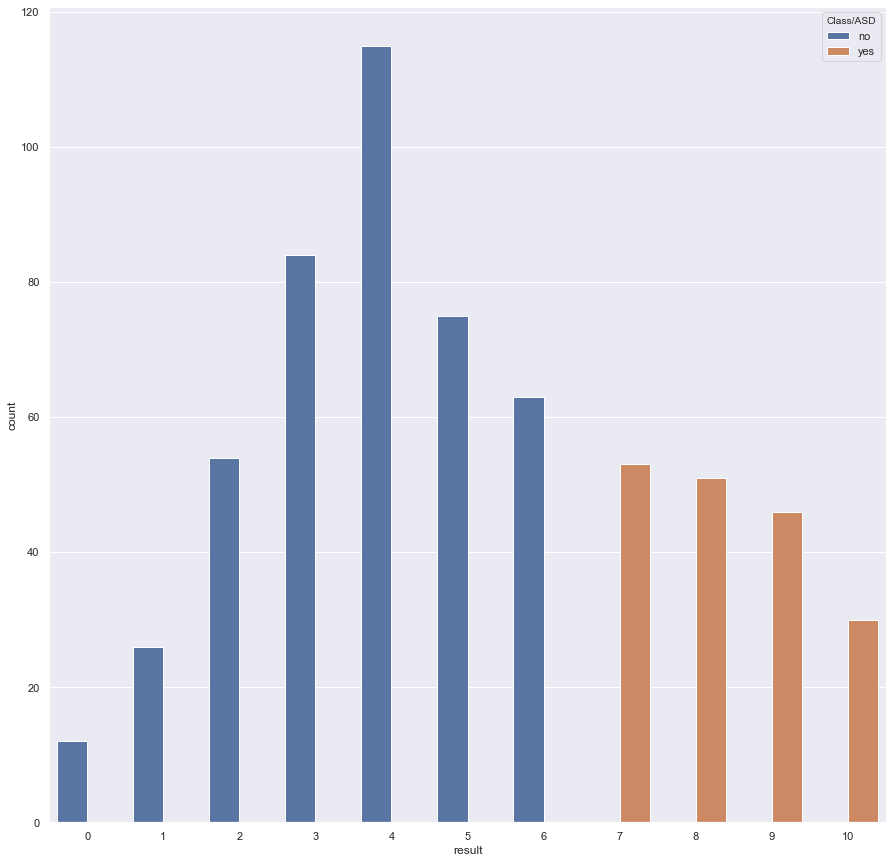

In [166]:
sns.countplot("result", data = data, hue = "Class/ASD")

#### The screening tests results having score of more than 6, are the positive cases.

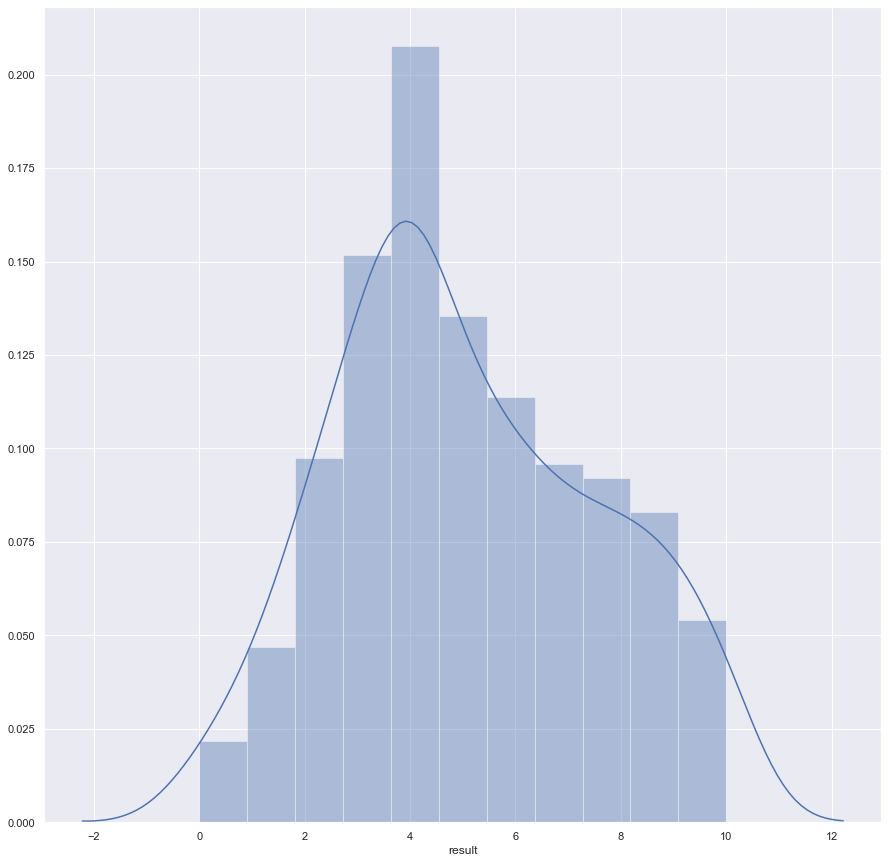

In [167]:
sns.distplot(data["result"])

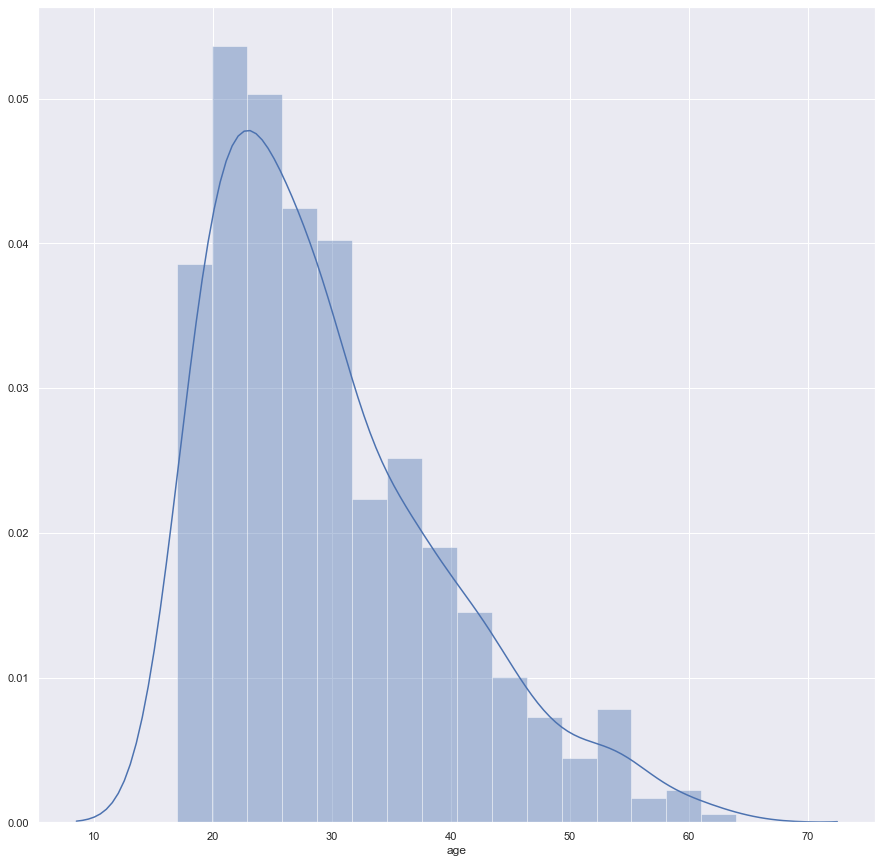

In [168]:
sns.distplot(data["age"])

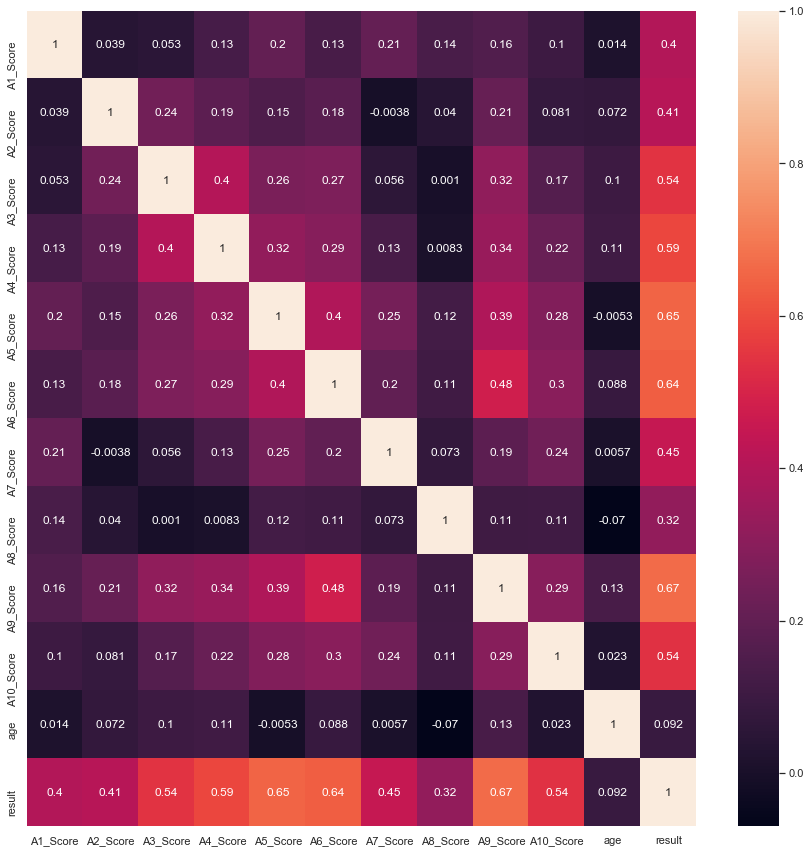

In [169]:
sns.heatmap(data.corr(), annot=True)

#### A3, 4, 5, 6, 9, 10 have much more affect on the score .

#### Hypothesis: if the case born with jaundice, has autism in the future. 

In [170]:
contingency_table = pd.crosstab(data["jaundice"], data["autism"], margins = True)

In [171]:
contingency_table # Whether the case was born with jaundice

autism,no,yes,All
jaundice,,,
no,483,67,550
yes,41,18,59
All,524,85,609


In [172]:
stats.chi2_contingency(contingency_table)

(14.902126847078474,
 0.0049085772686581165,
 4,
 array([[473.23481117,  76.76518883, 550.        ],
        [ 50.76518883,   8.23481117,  59.        ],
        [524.        ,  85.        , 609.        ]]))

#### The first value (14.09) is the Chi-square value, followed by the p-value (0.004), then comes the degrees of freedom (4), and lastly it outputs the expected frequencies as an array. Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there isnt a relationship between cases born with jaundice have autism.

#### Lets prepare our data for feeding it into the model, by converting the string features to numerical using LabelEncoder.

In [173]:
labelencoder = LabelEncoder()

In [174]:
categorical_columns = ["gender", "ethnicity", "jaundice", "autism", "country", "Class/ASD"]

In [175]:
data[categorical_columns] = data[categorical_columns].apply(lambda column: labelencoder.fit_transform(column))

In [176]:
y = data["Class/ASD"]

In [177]:
X = data.drop("Class/ASD", axis=1)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

In [179]:
y_train.value_counts(normalize=True)

0    0.704312
1    0.295688
Name: Class/ASD, dtype: float64

#### Since our target variable has imbalanced class we will plot the ROC curve.

In [180]:
def plot_roc(model_preds, model_original):
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(model_original, model_preds)
    
    plt.subplots(1, figsize=(10,10))
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.title("ROC curve of Model", fontsize = 14)
    plt.show()

In [181]:
lr = LogisticRegression(random_state=0)

In [182]:
lr.fit(X_train, y_train)

/home/daminijain/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [183]:
lr_y_pred = lr.predict(X_test)

In [184]:
score = metrics.accuracy_score(y_test, lr_y_pred)
print("The accuracy of Logistic model is: {0}".format(score))
precision = precision_recall_fscore_support(y_test, lr_y_pred, average= "binary")
print("The precision, recall and fscore are as follows: {0}".format(precision))

The accuracy of Logistic model is: 0.9590163934426229
The precision, recall and fscore are as follows: (0.9696969696969697, 0.8888888888888888, 0.927536231884058, None)


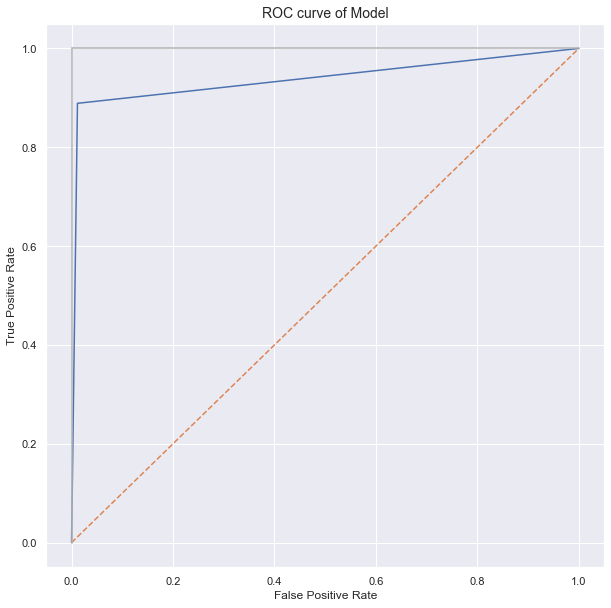

In [185]:
plot_roc(lr_y_pred, y_test)

In [186]:
rf = RandomForestClassifier(n_estimators=15, criterion="gini", random_state=0)

In [187]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [188]:
forest_y_pred = rf.predict(X_test)

In [189]:
score = metrics.accuracy_score(y_test, forest_y_pred)
print("The accuracy of Random Forest model is: {0}".format(score))
precision = precision_recall_fscore_support(y_test, forest_y_pred, average="binary")
print("The precision, recall and fscore are as follows: {0}".format(precision))

The accuracy of Random Forest model is: 1.0
The precision, recall and fscore are as follows: (1.0, 1.0, 1.0, None)


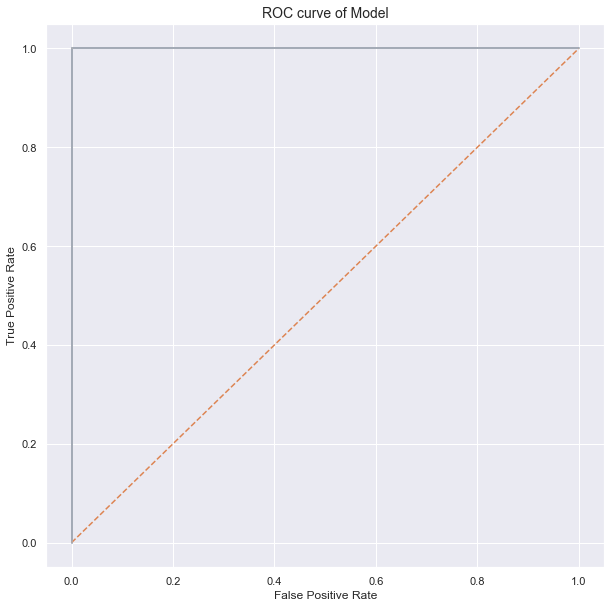

In [190]:
plot_roc(forest_y_pred, y_test)

In [191]:
feature_imp = pd.Series(rf.feature_importances_ ,index = X.columns).sort_values(ascending=False)

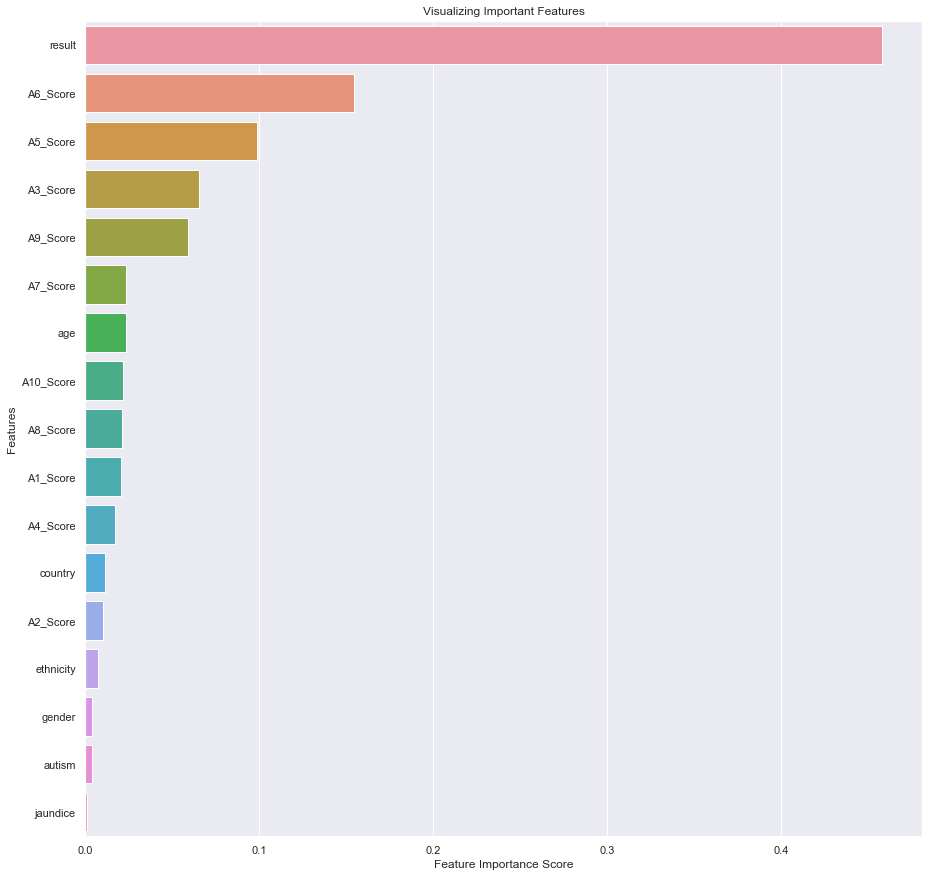

In [192]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

In [193]:
knn = KNeighborsClassifier(n_neighbors=2, metric = 'minkowski', p = 3)

In [194]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=3,
           weights='uniform')

In [195]:
y_pred_knn = knn.predict(X_test)

In [196]:
score = metrics.accuracy_score(y_test, y_pred_knn)
print("The accuracy of KNN model is: {0}".format(score))
precision = precision_recall_fscore_support(y_test, y_pred_knn, average= "binary")
print("The precision, recall and fscore are as follows: {0}".format(precision))

The accuracy of KNN model is: 0.860655737704918
The precision, recall and fscore are as follows: (0.9130434782608695, 0.5833333333333334, 0.7118644067796611, None)


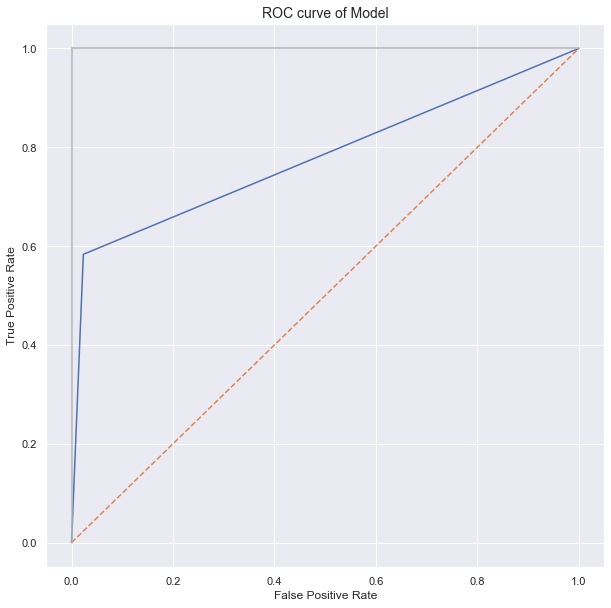

In [197]:
plot_roc(y_pred_knn, y_test)

In [198]:
svc = SVC(kernel = "rbf", random_state=0)

In [199]:
svc.fit(X_train, y_train)

/home/daminijain/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [200]:
y_pred_svc = svc.predict(X_test)

In [201]:
score = metrics.accuracy_score(y_test, y_pred_svc)
print("The accuracy of SVC model is: {0}".format(score))
precision = precision_recall_fscore_support(y_test, y_pred_svc, average="binary")
print("The precision, recall and fscore are as follows: {0}".format(precision))

The accuracy of SVC model is: 0.9016393442622951
The precision, recall and fscore are as follows: (0.9285714285714286, 0.7222222222222222, 0.8125000000000001, None)


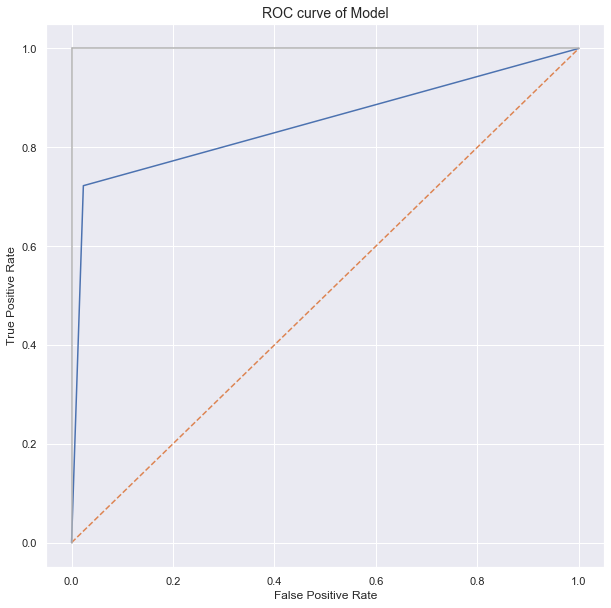

In [202]:
plot_roc(y_pred_svc, y_test)

In [203]:
tree = DecisionTreeClassifier(criterion="gini", random_state=42)

In [204]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [205]:
y_pred_tree = tree.predict(X_test)

In [206]:
score = metrics.accuracy_score(y_test, y_pred_tree)
print("The accuracy of Decision Tree model is: {0}".format(score))
precision = precision_recall_fscore_support(y_test, y_pred_tree, average="binary")
print("The precision, recall and fscore are as follows: {0}".format(precision))

The accuracy of Decision Tree model is: 1.0
The precision, recall and fscore are as follows: (1.0, 1.0, 1.0, None)


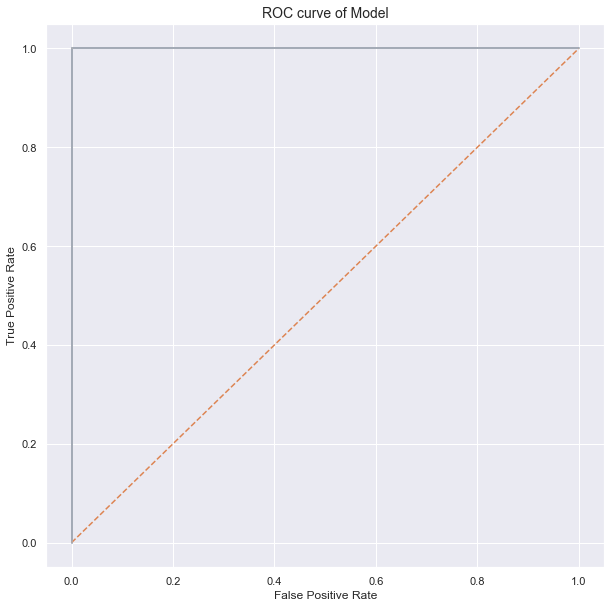

In [207]:
plot_roc(y_pred_tree, y_test)

In [208]:
bayes = GaussianNB()

In [209]:
bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [210]:
y_pred_bayes = bayes.predict(X_test)

In [211]:
score = metrics.accuracy_score(y_test, y_pred_bayes)
print("The accuracy of Bayes model is: {0}".format(score))
precision = precision_recall_fscore_support(y_test, y_pred_bayes, average="binary")
print("The precision, recall and fscore are as follows: {0}".format(precision))

The accuracy of Bayes model is: 0.9672131147540983
The precision, recall and fscore are as follows: (0.9444444444444444, 0.9444444444444444, 0.9444444444444444, None)


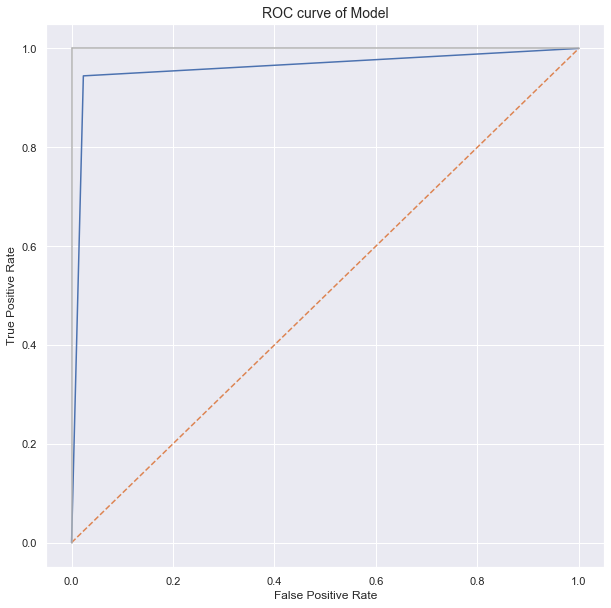

In [212]:
plot_roc(y_pred_bayes, y_test)

In [213]:
xboost = XGBClassifier(random_state=42)

In [214]:
xboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [215]:
y_pred_boost = xboost.predict(X_test)

In [216]:
score = metrics.accuracy_score(y_test, y_pred_boost)
print("The accuracy of Extreme Gradient is: {0}".format(score))
precision = precision_recall_fscore_support(y_test, y_pred_boost, average="binary")
print("The precision, recall and fscore are as follows: {0}".format(precision))

The accuracy of Extreme Gradient is: 1.0
The precision, recall and fscore are as follows: (1.0, 1.0, 1.0, None)


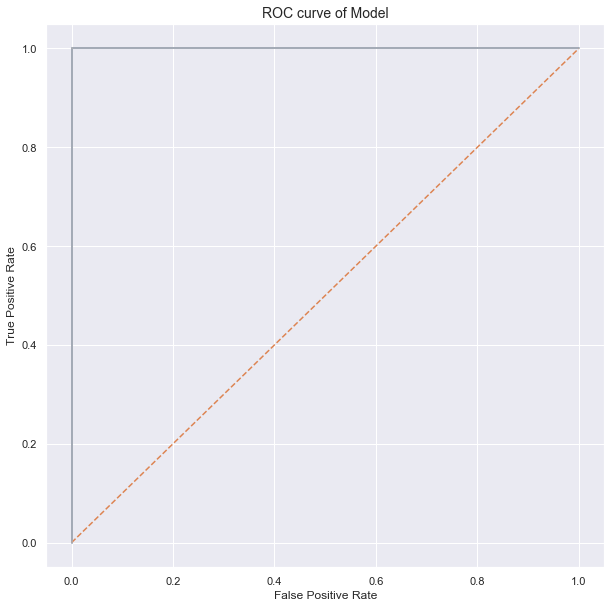

In [217]:
plot_roc(y_pred_boost, y_test)

In [218]:
clf_svm = SGDClassifier(random_state=42)
clf_svm.fit(X_train, y_train)
pred_svm = clf_svm.predict(X_test)
score_svm = metrics.accuracy_score(y_test, pred_svm)
print("The accuracy of stochastic gradient descent model is: {0}".format(score_svm))
precision_svm = precision_recall_fscore_support(y_test, pred_svm, average="binary")
print("The precision, recall and fscore are as follows: {0}".format(precision_svm))

The accuracy of stochastic gradient descent model is: 0.9262295081967213
The precision, recall and fscore are as follows: (0.9090909090909091, 0.8333333333333334, 0.8695652173913043, None)


/home/daminijain/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


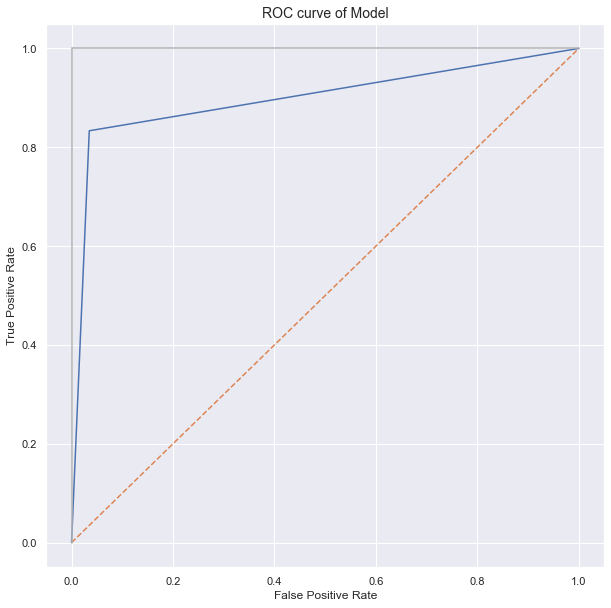

In [219]:
plot_roc(pred_svm, y_test)